In [1]:
import numpy as np
from skimage import io
import networkx as nx
import re
from pathlib import Path
import os
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from skimage import exposure
from tqdm import tqdm
import scipy as sp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
folder = Path('matt_preds_graphs_fwhm_single_excel/')
files  = list(folder.glob('*amended_full*.pickle'))
files  = sorted([x.as_posix() for x in files])
files = [x for x in files if '_0001' in x]
files = [x for x in files if '06162021_4' not in x]
files = [x for x in files if '20200217_14' not in x]
files = [x for x in files if '20200217_7' not in x]
files = [x for x in files if '06162021_4' not in x]
files = [x for x in files if 'forepaw' not in x]
len(files)

277

In [18]:
graph.edges[edge].keys()

dict_keys(['pts', 'weight', 'radii', 'radii_std', 'mean_neuron_distance', 'neuron_distance_std', 'neuron_distance_min', 'gender', 'path_weights', 'path_weights_uncertanty', 'end-0z', 'end-0y', 'end-0x', 'end-1z', 'end-1y', 'end-1x', 'mean_depth', 'euclidean-dst', 'subject', 'treatment', 'wavelength', 'power', 'age', 'days_post_injury', 'start_depth', 'path_weights_nrn', 'start_weight', 'imaging_weight', 'vessel_id', 'scan', 'vertex_delta', 'mean_vessel_radii_baseline', 'std_vessel_radii_baseline', 'num_vessel_radii_baseline', 'delta_radii', 'timepoint'])

In [44]:
file_0001 = files[0]
file = re.sub('_0001','',file_0001)
graph = nx.read_gpickle(file)
graph_0001 = nx.read_gpickle(file_0001)
for i,edge in enumerate(graph.edges):
    radii = graph.edges[edge]['radii']
    radii_0001 = graph_0001.edges[edge]['radii']
    graph_0001.edges[edge]['delta_radii'] = radii_0001 - radii
df = nx.to_pandas_edgelist(graph_0001)

for j, file_0001 in enumerate(files[1:]):
    file = re.sub('_0001','',file_0001)
    graph = nx.read_gpickle(file)
    graph_0001 = nx.read_gpickle(file_0001)
    if len(list(graph_0001)) == len(list(graph)):
        for i,edge in enumerate(graph.edges):
            radii = graph.edges[edge]['radii']
            radii_0001 = graph_0001.edges[edge]['radii']
            graph_0001.edges[edge]['delta_radii'] = radii_0001 - radii
        df = df.append(nx.to_pandas_edgelist(graph_0001))

In [45]:
#np.unique(df['power'])

In [65]:
_df = df[df['delta_radii']<-0.2]
_df = _df[_df['radii']<2.3]
_df = _df[_df['radii']>1.6]
_df = _df[_df['weight']>50]
_df = _df[_df['weight']<75]
_df = _df[_df['wavelength']==458]
_df = _df[_df['power']==20]
val,count = np.unique(_df['vessel_id'], return_counts=True)
val = val[count==2]
len(val)

11

In [69]:
#17117, 17277, 
res = []
for j, file_0001 in enumerate(files[:]):
    file = re.sub('_0001','',file_0001)
    graph = nx.read_gpickle(file)
    graph_0001 = nx.read_gpickle(file_0001)
    if len(list(graph_0001)) == len(list(graph)):
        for i,edge in enumerate(graph.edges):
            radii = graph.edges[edge]['radii']
            radii_0001 = graph_0001.edges[edge]['radii']
            #vessel_id = graph_0001.edges[edge]['vessel_id']
            if graph.edges[edge]['vessel_id'] in val:
                if len(graph.edges[edge]['pts'])>40 and graph.edges[edge]['wavelength'] == 458:
                    #print(file)
                    print(j, i, radii_0001-radii, radii)
                    res.append(tuple((j,i)))

34 67 -0.0751279532014828 2.608421276844071
34 122 0.3436729184635725 2.5755462755776803
34 258 -0.052374283741381866 2.4316525484763027
35 67 -1.0164949606284914 2.6314706943383417
35 122 -0.677401670865855 2.8486046608672795
35 258 -0.3374507638026314 2.4008605925091993
36 67 -0.23353113753647414 1.005386094841977
36 122 -0.24343482250034199 1.1135702599597832
36 258 -0.3199197402203495 1.4322162178225546
40 280 0.3114434268768864 4.173335673556238
40 300 0.22699988972128438 1.513607972514519
54 380 0.016004406340299315 2.322963179540109
54 473 0.13855652213351144 2.5892836275924513
57 380 -0.485529024696129 2.2268728808155616
57 473 -0.8857876108390959 2.499937544833739
58 380 -0.22850644835626066 2.0713737003505464
58 473 -0.4250250280169534 2.5702580134846573
144 119 0.8220543670216484 0.8878573379152704
158 224 0.24072579768621583 1.282181056744277
160 224 -0.2791438068128216 1.996258731100098
161 224 -0.48551589383309834 2.2721382933633016
190 397 -0.09862250207396883 2.52885957

In [70]:
#res[75:]

(34, 67)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres146_warped_radii_amended_full.pickle
-0.0751279532014828


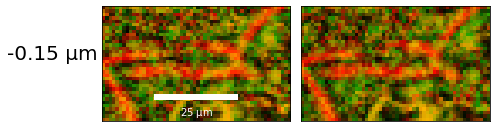

(34, 122)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres146_warped_radii_amended_full.pickle
0.3436729184635725


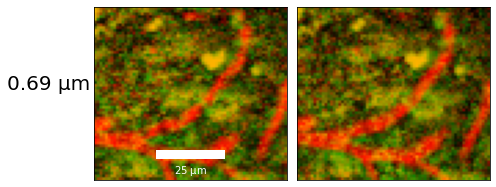

(34, 258)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres146_warped_radii_amended_full.pickle
-0.052374283741381866


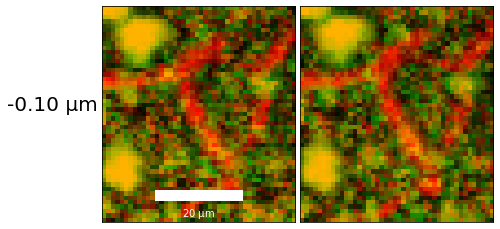

(35, 67)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres147_warped_radii_amended_full.pickle
-1.0164949606284914


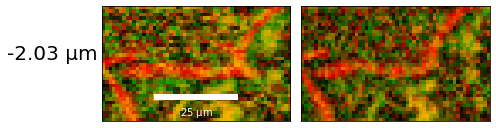

(35, 122)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres147_warped_radii_amended_full.pickle
-0.677401670865855


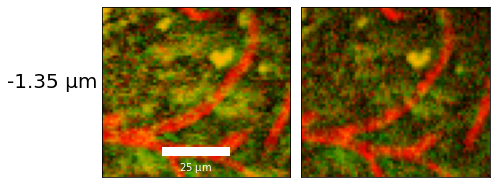

(35, 258)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres147_warped_radii_amended_full.pickle
-0.3374507638026314


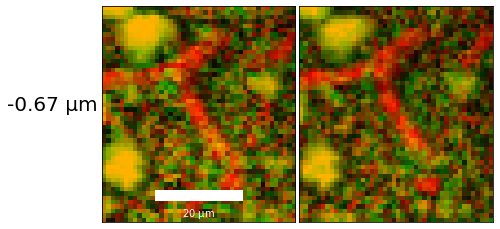

(36, 67)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres148_warped_radii_amended_full.pickle
-0.23353113753647414


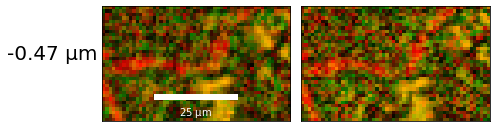

(36, 122)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres148_warped_radii_amended_full.pickle
-0.24343482250034199


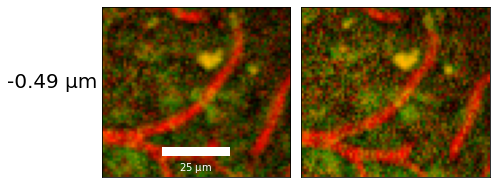

(36, 258)
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres148_warped_radii_amended_full.pickle
-0.3199197402203495


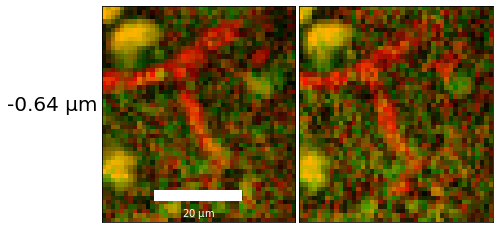

(40, 280)
matt_preds_graphs_fwhm_single_excel/20200227_22-XYZres160_warped_radii_amended_full.pickle
0.3114434268768864


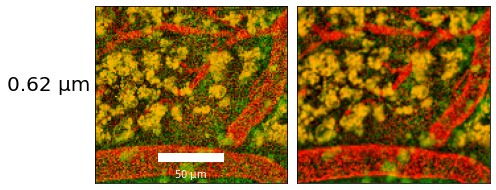

(40, 300)
matt_preds_graphs_fwhm_single_excel/20200227_22-XYZres160_warped_radii_amended_full.pickle
0.22699988972128438


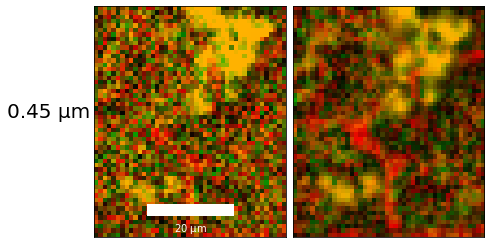

(54, 380)
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres173_warped_radii_amended_full.pickle
0.016004406340299315


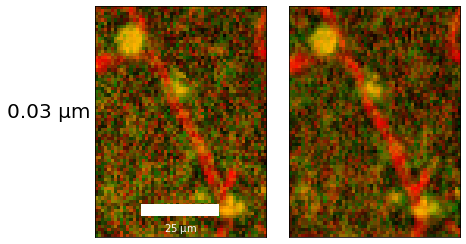

(54, 473)
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres173_warped_radii_amended_full.pickle
0.13855652213351144


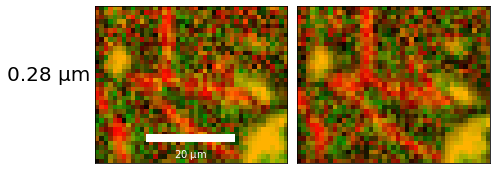

(57, 380)
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres176_warped_radii_amended_full.pickle
-0.485529024696129


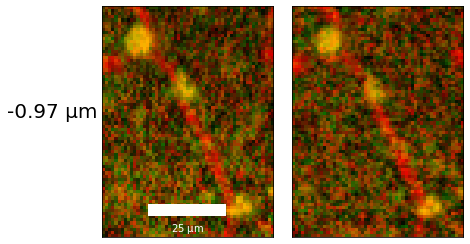

(57, 473)
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres176_warped_radii_amended_full.pickle
-0.8857876108390959


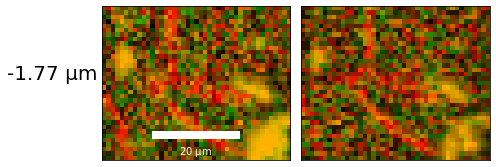

(58, 380)
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres177_warped_radii_amended_full.pickle
-0.22850644835626066


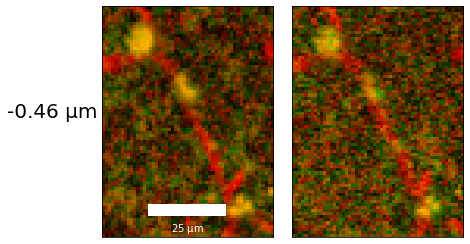

(58, 473)
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres177_warped_radii_amended_full.pickle
-0.4250250280169534


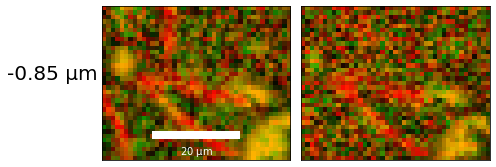

(144, 119)
matt_preds_graphs_fwhm_single_excel/20210710_55-XYZres349_warped_radii_amended_full.pickle
0.8220543670216484


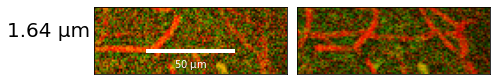

(158, 224)
matt_preds_graphs_fwhm_single_excel/20211101_65-XYZres398_warped_radii_amended_full.pickle
0.24072579768621583


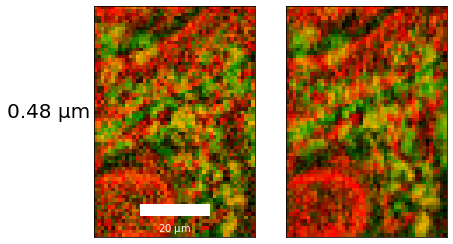

(160, 224)
matt_preds_graphs_fwhm_single_excel/20211101_65-XYZres401_warped_radii_amended_full.pickle
-0.2791438068128216


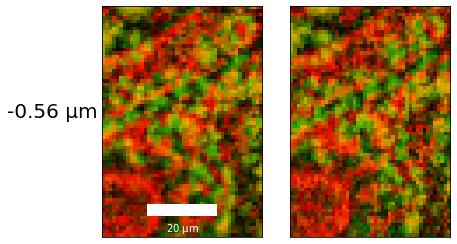

(161, 224)
matt_preds_graphs_fwhm_single_excel/20211101_65-XYZres402_warped_radii_amended_full.pickle
-0.48551589383309834


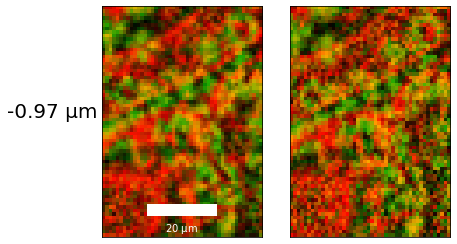

(190, 397)
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres383_warped_radii_amended_full.pickle
-0.09862250207396883


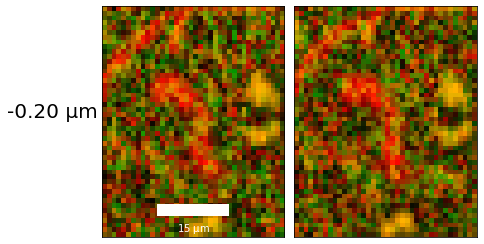

(190, 824)
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres383_warped_radii_amended_full.pickle
0.22598710046789305


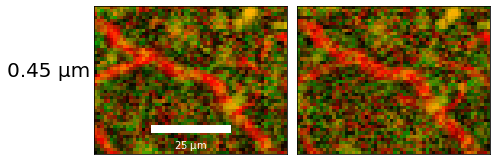

(191, 397)
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres384_warped_radii_amended_full.pickle
-0.9320348872307547


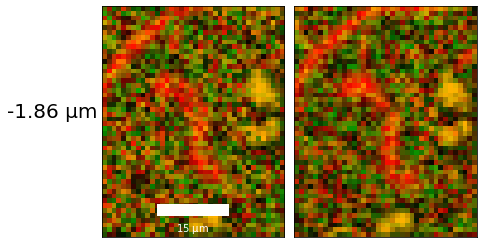

(191, 824)
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres384_warped_radii_amended_full.pickle
0.11040754096639382


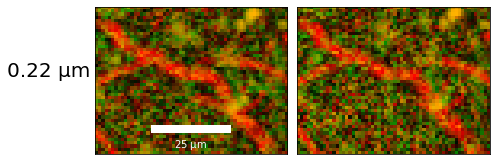

(195, 397)
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres388_warped_radii_amended_full.pickle
-0.37779026122364523


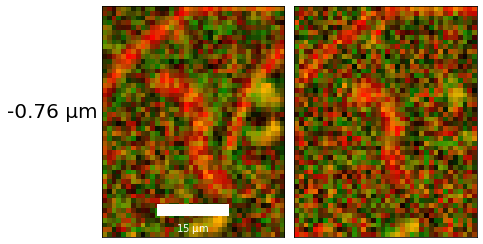

(195, 824)
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres388_warped_radii_amended_full.pickle
-0.464203148791984


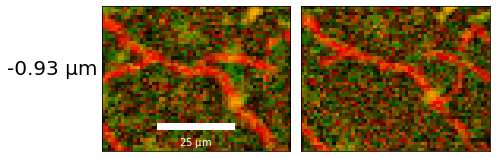

In [71]:
#[17,389],[5,199],[37,507],[24,26],[13,9],[0,18]
#[5,368],[37,307],[24,418],[13,456],[13,394],[17,86]
#files_edge = np.array([[17,389],[37,507],[24,26],[13,9],[0,18]])
files_edge = np.array([[205,343],[41,367],[49,7],[176,54],[180,291],[199,89]])

position = ['lower center','center left', 'lower center','lower left','upper right', 'upper left']
#position = ['lower center','lower center', 'lower center','lower center','lower left', 'upper right']
for params in res[:]:
    print(params)
    fig, ax = plt.subplots(1,2)
    file_0001 = files[params[0]]
    file = re.sub('_0001','',file_0001)
    print(file)
    img = io.imread(re.sub('_radii_amended_full.pickle','.tif',re.sub('matt_preds_graphs_fwhm_single_excel','matt_raw_warped_single',file)))
    img_0001 = io.imread(re.sub('_radii_amended_full.pickle','.tif',re.sub('matt_preds_graphs_fwhm_single_excel','matt_raw_warped_single',file_0001)))
    img_ch2 = sp.ndimage.zoom(np.swapaxes(img[:,1,:,:],0,2),(1,1,2.645833333),order=0)
    img = sp.ndimage.zoom(np.swapaxes(img[:,0,:,:],0,2),(1,1,2.645833333),order=0)
    img_0001_ch2 = sp.ndimage.zoom(np.swapaxes(img_0001[:,1,:,:],0,2),(1,1,2.645833333),order=0)
    img_0001 = sp.ndimage.zoom(np.swapaxes(img_0001[:,0,:,:],0,2),(1,1,2.645833333),order=0)
    graph = nx.read_gpickle(file)
    graph_0001 = nx.read_gpickle(file_0001)
    edges = list(graph.edges)
    edge = edges[params[1]]
    #print(edges[params[1]])
    radii = graph.edges[edge]['radii']
    radii_0001 = graph_0001.edges[edge]['radii']
    pts = graph.edges[edge]['pts']
    mx = np.max(pts,axis=0) + 15
    mn = np.min(pts,axis=0) - 15
    mn[mn<0] = 0
    mx[mx>511] = 511
    pt = pts[:,:2]- np.array([mn[0],mn[1]]) - 1
    _img = exposure.equalize_adapthist(np.max(img[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    _show_img = np.zeros(list(_img.shape) + [3])
    _show_img[:,:,0] = _img
    _show_img[:,:,1] = 0.7*exposure.equalize_adapthist(np.max(img_ch2[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    ax[0].imshow(_show_img)
    ax[0].tick_params(left = False, right = False, labelleft = False ,labelbottom = False, bottom = False)
    print(radii_0001-radii)
    ax[0].set_ylabel("{:.2f}".format(round((radii_0001-radii)*2, 2)) + str(u' \u03bcm'), rotation=0, fontsize=20, ha='right')
    scalebar = ScaleBar(1,units="um", 
                        length_fraction = 0.5, 
                        location = position[0], 
                        pad=0.1, 
                        color='white', 
                        frameon=False,
                        width_fraction = 0.05) # 1 pixel = 0.2 meter
    scalebar2 = ScaleBar(1,units="um", 
                        length_fraction = 0.5, 
                        location = position[0], 
                        pad=0.1, 
                        color='white', 
                        frameon=False,
                        width_fraction = 0.05) # 1 pixel = 0.2 meter
    ax[0].add_artist(scalebar)
    #ax[i,1].add_artist(scalebar2)
    _img_0001 = np.max(img_0001[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2)
    _show_img_0001 = np.zeros(list(_img_0001.shape) + [3])
    _show_img_0001[:,:,0] = exposure.equalize_adapthist(_img_0001, clip_limit=0.03)
    _show_img_0001[:,:,1] = 0.7*exposure.equalize_adapthist(np.max(img_0001_ch2[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    ax[1].imshow(_show_img_0001)
    ax[1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    fig.set_figheight(3.5)
    fig.set_figwidth(7)
    fig.tight_layout()
    fig.show()
    plt.pause(1)
#fig.savefig('seeingIsBeiliving_James.png')

matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres148_warped_radii_amended_full.pickle
-0.24343482250034199
matt_preds_graphs_fwhm_single_excel/20200227_20-XYZres147_warped_radii_amended_full.pickle
-0.677401670865855
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres176_warped_radii_amended_full.pickle
-0.485529024696129
matt_preds_graphs_fwhm_single_excel/20200411_26-XYZres177_warped_radii_amended_full.pickle
-0.22850644835626066
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres383_warped_radii_amended_full.pickle
-0.09862250207396883
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres384_warped_radii_amended_full.pickle
-0.9320348872307547
matt_preds_graphs_fwhm_single_excel/20220129_67-XYZres388_warped_radii_amended_full.pickle
-0.37779026122364523


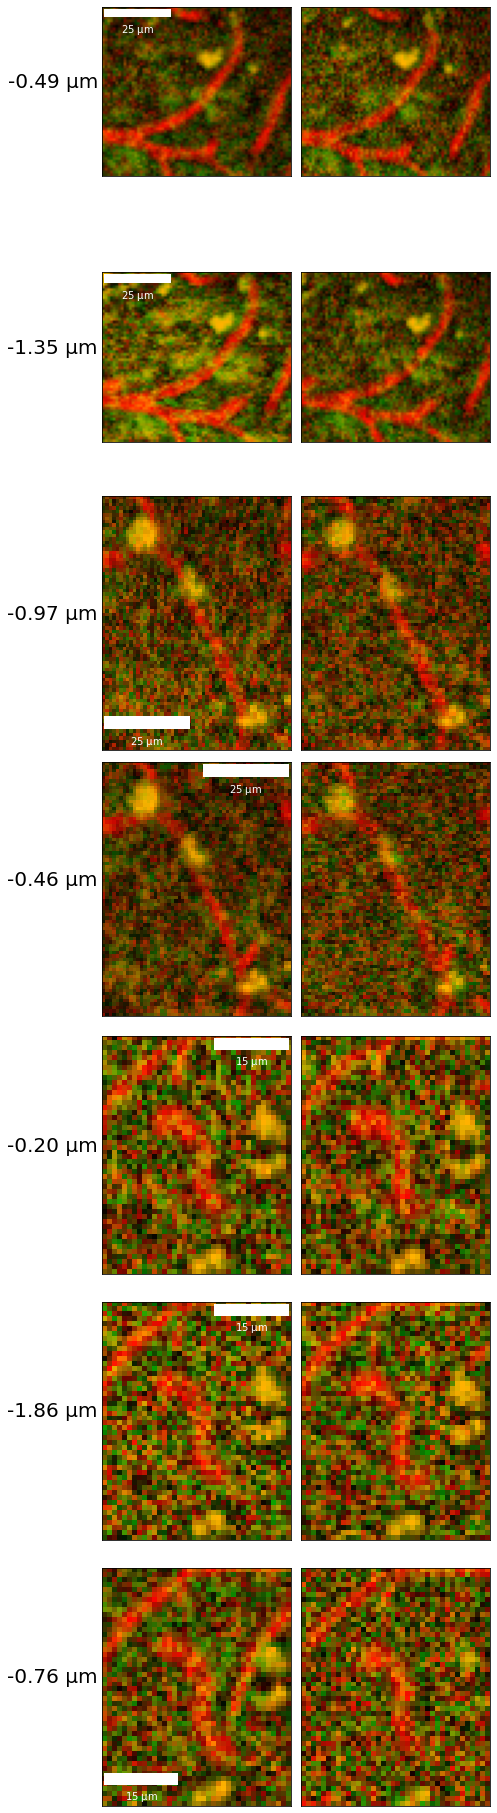

In [77]:
#[17,389],[5,199],[37,507],[24,26],[13,9],[0,18]
#[5,368],[37,307],[24,418],[13,456],[13,394],[17,86]
#files_edge = np.array([[17,389],[37,507],[24,26],[13,9],[0,18]])
files_edge = np.array([[21,244],[25,135],[35,81],[45,554]])
files_edge = np.array([[147,144],[155,339],[158,525],[224,213]])
files_edge = np.array([[36,122],[35,122],[57,380],[58,380],[190,397],[191,397],[195,397]])
fig, ax = plt.subplots(len(files_edge),2)
position = ['upper left','upper left', 'lower left','upper right','upper right', 'upper right','lower left','upper right', 'upper left']
#position = ['lower center','lower center', 'lower center','lower center','lower left', 'upper right']
for i,params in enumerate(files_edge):
    file_0001 = files[params[0]]
    file = re.sub('_0001','',file_0001)
    print(file)
    img = io.imread(re.sub('_radii_amended_full.pickle','.tif',re.sub('matt_preds_graphs_fwhm_single_excel','matt_raw_warped_single',file)))
    img_0001 = io.imread(re.sub('_radii_amended_full.pickle','.tif',re.sub('matt_preds_graphs_fwhm_single_excel','matt_raw_warped_single',file_0001)))
    img_ch2 = sp.ndimage.zoom(np.swapaxes(img[:,1,:,:],0,2),(1,1,2.645833333),order=0)
    img = sp.ndimage.zoom(np.swapaxes(img[:,0,:,:],0,2),(1,1,2.645833333),order=0)
    img_0001_ch2 = sp.ndimage.zoom(np.swapaxes(img_0001[:,1,:,:],0,2),(1,1,2.645833333),order=0)
    img_0001 = sp.ndimage.zoom(np.swapaxes(img_0001[:,0,:,:],0,2),(1,1,2.645833333),order=0)
    graph = nx.read_gpickle(file)
    graph_0001 = nx.read_gpickle(file_0001)
    edges = list(graph.edges)
    edge = edges[params[1]]
    #print(edges[params[1]])
    radii = graph.edges[edge]['radii']
    radii_0001 = graph_0001.edges[edge]['radii']
    pts = graph.edges[edge]['pts']
    mx = np.max(pts,axis=0) + 15
    mn = np.min(pts,axis=0) - 15
    mn[mn<0] = 0
    mx[mx>511] = 511
    pt = pts[:,:2]- np.array([mn[0],mn[1]]) - 1
    _img = exposure.equalize_adapthist(np.max(img[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    _show_img = np.zeros(list(_img.shape) + [3])
    _show_img[:,:,0] = _img
    _show_img[:,:,1] = 0.7*exposure.equalize_adapthist(np.max(img_ch2[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    ax[i,0].imshow(_show_img)
    ax[i,0].tick_params(left = False, right = False, labelleft = False ,labelbottom = False, bottom = False)
    print(radii_0001-radii)
    ax[i,0].set_ylabel("{:.2f}".format(round((radii_0001-radii)*2, 2)) + str(u' \u03bcm'), rotation=0, fontsize=20, ha='right')
    scalebar = ScaleBar(1,units="um", 
                        length_fraction = 0.5, 
                        location = position[i], 
                        pad=0.1, 
                        color='white', 
                        frameon=False,
                        width_fraction = 0.05) # 1 pixel = 0.2 meter
    scalebar2 = ScaleBar(1,units="um", 
                        length_fraction = 0.5, 
                        location = position[i], 
                        pad=0.1, 
                        color='white', 
                        frameon=False,
                        width_fraction = 0.05) # 1 pixel = 0.2 meter
    ax[i,0].add_artist(scalebar)
    #ax[i,1].add_artist(scalebar2)
    _img_0001 = np.max(img_0001[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2)
    _show_img_0001 = np.zeros(list(_img_0001.shape) + [3])
    _show_img_0001[:,:,0] = exposure.equalize_adapthist(_img_0001, clip_limit=0.03)
    _show_img_0001[:,:,1] = 0.7*exposure.equalize_adapthist(np.max(img_0001_ch2[mn[0]:mx[0],mn[1]:mx[1],mn[2]:mx[2]],axis=2), clip_limit=0.03)
    ax[i,1].imshow(_show_img_0001)
    ax[i,1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
fig.set_figheight(26)
fig.set_figwidth(7)
fig.tight_layout()
fig.savefig('seeingIsBeiliving_repeated_caps.jpeg')

In [102]:
graph_file = files[224]

In [103]:
graph_0001 = nx.read_gpickle(graph_file)
graph = nx.read_gpickle(re.sub('_0001','',graph_file))

In [104]:
b, a = sp.signal.butter(3, 0.05/0.5, btype='low', analog=False, fs=1)
for edge in tqdm(graph.edges):
    graph[edge[0]][edge[1]]['path_weights_filtered'] = graph[edge[0]][edge[1]]['path_weights']#sp.signal.filtfilt(b, a, graph[edge[0]][edge[1]]['path_weights'],padlen=0)
    graph_0001[edge[0]][edge[1]]['path_weights_filtered'] = graph_0001[edge[0]][edge[1]]['path_weights']#sp.signal.filtfilt(b, a, graph_0001[edge[0]][edge[1]]['path_weights'],padlen=0)

100%|██████████| 419/419 [00:00<00:00, 162108.05it/s]


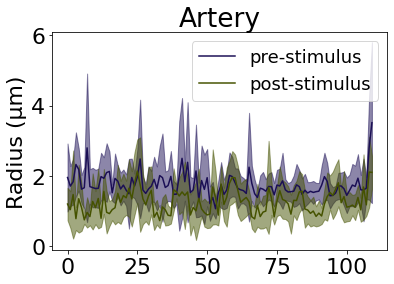

In [105]:
matplotlib.rcParams.update({'font.size': 22})
b, a = sp.signal.butter(3, 0.05/0.5, btype='low', analog=False, fs=1)
edges = list(graph.edges)
fig, axs = plt.subplots(1, 1)
edge = edges[213]
y = np.array(graph[edge[0]][edge[1]]['path_weights'])
#y = sp.signal.filtfilt(b, a, y, padlen=0)
y_error = np.array(graph[edge[0]][edge[1]]['path_weights_uncertanty'])#
#y_error = sp.signal.filtfilt(b, a, y_error, padlen=0)
x = np.arange(0,len(y),1)
axs.plot(x,y,label='pre-stimulus', color='#1B0F55')
axs.fill_between(x, y-y_error, y+y_error, alpha=0.5, color='#1B0F55')
y_0001 = np.array(graph_0001[edge[0]][edge[1]]['path_weights'])
#y_0001 = sp.signal.filtfilt(b, a, y_0001, padlen=0)
y_0001_error = np.array(graph_0001[edge[0]][edge[1]]['path_weights_uncertanty'])
#y_0001_error = sp.signal.filtfilt(b, a, y_0001_error, padlen=0)
axs.plot(x,y_0001,label='post-stimulus', color='#455200')
axs.fill_between(x, y_0001-y_0001_error, y_0001+y_0001_error, alpha=0.5, color='#455200')
#ax0 = axs[0].twinx()
#ax0.plot(x,np.array(graph[edge[0]][edge[1]]['path_weights_nrn']),color='red',label='neuron distance')
#axs[0].set_xlabel(u'Distance along vessel centerline (\u03bcm)')
axs.set_ylabel(u'Radius (\u03bcm)')
axs.set_title('Artery')
axs.legend(loc='upper right', fontsize="18")

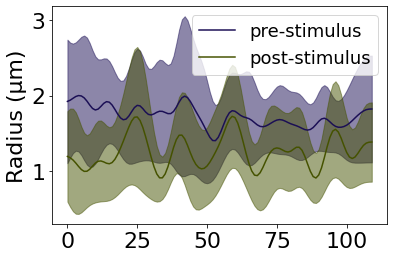

In [109]:
matplotlib.rcParams.update({'font.size': 22})
b, a = sp.signal.butter(3, 0.05/0.5, btype='low', analog=False, fs=1)
edges = list(graph.edges)
fig, axs = plt.subplots(1, 1)
y = np.array(graph[edge[0]][edge[1]]['path_weights'])
y = sp.signal.filtfilt(b, a, y, padlen=0)
y_error = np.array(graph[edge[0]][edge[1]]['path_weights_uncertanty'])#
y_error = sp.signal.filtfilt(b, a, y_error, padlen=0)
x = np.arange(0,len(y),1)
axs.plot(x,y,label='pre-stimulus', color='#1B0F55')
axs.fill_between(x, y-y_error, y+y_error, alpha=0.5, color='#1B0F55')
y_0001 = np.array(graph_0001[edge[0]][edge[1]]['path_weights'])
y_0001 = sp.signal.filtfilt(b, a, y_0001, padlen=0)
y_0001_error = np.array(graph_0001[edge[0]][edge[1]]['path_weights_uncertanty'])
y_0001_error = sp.signal.filtfilt(b, a, y_0001_error, padlen=0)
axs.plot(x,y_0001,label='post-stimulus', color='#455200')
axs.fill_between(x, y_0001-y_0001_error, y_0001+y_0001_error, alpha=0.5, color='#455200')
#ax0 = axs[0].twinx()
#ax0.plot(x,np.array(graph[edge[0]][edge[1]]['path_weights_nrn']),color='red',label='neuron distance')
#axs[0].set_xlabel(u'Distance along vessel centerline (\u03bcm)')
axs.set_ylabel(u'Radius (\u03bcm)')
#axs.set_title('Artery')
axs.legend(loc='upper right', fontsize="18")
fig.savefig('vessel_breaks.jpeg')